# GANs - GENERATIVE ADVERSARIAL NETWORKS

Introduction to Generative Adversarial Networks or GANs. 

This notebook is organized as follows:

1. **Background**
2. **Definition**
3. **Training GANs with Keras and TensorFlow**

---

*"...the most interesting idea in the last 10 years in ML". Yann LeCun*

---

## 1. Background

Brief definition of some concepts, such as supervised and unsupervised learning, and discriminative and generative models.

### Supervised learning

Supervised learning algorithms learn to map a function $\hat{y}=f(x)$, given labeled data y.

* Examples: Classification algorithms (SVM), regression algorithms (Linear regression).

* Applications: Object detection, semantic segmentation, image captioning, etc.

### Unsupervised learning

Unsupervised learning algorithms learn the underlying structure of the given data, without specifying a target value.

* Examples: Clustering algorithms (k-means), generative models (GANs)

* Applications: Dimensionality reduction, feature learning, density estimation, etc.

### Discriminative models

Most of the supervised learning algorithms are inherently discriminative. 

Discriminative model allows us to evaluate the **conditional probability** $P(y|x)$.

Learns a function that maps the input $x$ to an output $y$.

* Examples: Logistic regression, Support Vector Machines, Neural networks.

### Generative models

Most of the unsupervised learning algorithms are inherently generative.

Generative model can allows us to evaluate the **joint probability** $P(x,y)$.

Tries to learn a joint probability of the input $x$ and the output $y$ at the same time.

* Examples: Latent Dirichlet allocation, Restricted Boltzmann machine, Generative adversarial networks.


## 2. Definition

[Generative Adversarial Networks or GANs](https://arxiv.org/abs/1406.2661) is a framework proposed by [Ian Goodfellow](http://www.iangoodfellow.com/), Yoshua Bengio and others in 2014.

GANs are composed of two models, represented by neural networks:
* The first model is called a **Generator** and it aims to generate new data similar to the expected one. 
* The second model is named the **Discriminator** and it aims to recognize if an input data is ‘real’ — belongs to the original dataset — or if it is ‘fake’ — generated by a forger.

![GANs](https://www.kdnuggets.com/wp-content/uploads/generative-adversarial-network.png)

### Generator Network

The input to the generator is a series of randomly generated numbers called **latent sample**. It tries to produce data that come from some probability distribution. The generator network takes random noise as input, then runs that noise through a differentiable function to transform the noise and reshape it to have recognizable structure. The output of the generator network ia a realistic image. Without training, the generator produces garbage images only.


### Discriminator Network

The discriminator is a **classifier** trained using the **supervised learning**. It classifies whether an image is real (1) or is fake (0).

### Training GANs: Two player game 

The Generator (forger) needs to learn how to create data in such a way that the Discriminator isn’t able to distinguish it as fake anymore. The competition between these two teams is what improves their knowledge, until the Generator succeeds in creating realistic data.

$G$ try to fool discriminator by generating real-looking images.

$D$ try to distinguish between real and fake images.

Train jointly in **minimax game**

Minimax objetive function (Value Function of Minimax Game played by Generator and Discriminator):

$$ \underset{\theta_{g}}{min} \: \underset{\theta_{d}}{max} \; V(D,G) = \mathbb{E}_{x\sim p_{data}(x)}[log D_{\theta_{d}}(x)] + \mathbb{E}_{z\sim p_{z}(z)}[log(1 - D_{\theta_{d}}(G_{\theta_{g}}(z)))]$$

* $D_{\theta_{d}}$ wnats to maximize  objective such that $D(x)$ is close to 1 (real) and $D(G(z))$ is close to 0 (fake).
* $G_{\theta_{g}}$ wants to minimize objective such that $D(G(z))$ is close to 1 (discriminator is fooled into thinking generated G(z) is real).

Alternate between:
1. Gradient ascent on D
$$\underset{\theta_{d}}{max} [\mathbb{E}_{x\sim p_{data}(x)}log D_{\theta_{d}}(x) + \mathbb{E}_{z\sim p_{z}(z)}log(1 - D_{\theta_{d}}(G_{\theta_{g}}(z)))]$$

2. Instead: Gradient ascent on generator, different objective
$$\underset{\theta_{g}}{max}[\mathbb{E}_{z\sim p_{z}(z)}[log( D_{\theta_{d}}(G_{\theta_{g}}(z)))] $$

Instead of minimizing likelihood of discriminator being correct, now maximize likelihood of discriminator being wrong. Same objetive of fooling discriminator, but now higher gradient signal for bad samples => works much better!

As a result, 
* the Discriminator is trained to correctly classify the input data as either real or fake. 
    * This means it’s weights are updated as to maximize the probability that any real data input x is classified as belonging to the real dataset, while minimizing the probability that any fake image is classified as belonging to the real dataset. 
    * In more technical terms, the loss/error function used maximizes the function D(x), and it also minimizes D(G(z)).
* the Generator is trained to fool the Discriminator by generating data as realistic as possible, which means that the Generator’s weight’s are optimized to maximize the probability that any fake image is classified as belonging to the real dataset. Formally this means that the loss/error function used for this network maximizes D(G(z)).

### Practical tips and tricks for training

It’s important to choose a good overall architecture. For this architecture:
* That both the generator and the discriminator have at least one hidden layer.
* Two simultaneous optimizations. 
* We define a loss for the G and D. Minimize the loss for the D, while simultaneously use another optimizer to minimize the loss for the G. 
* Overall this recipe of using batch normalization, Adam optimization and Cross entropy losses with label smoothing works fairly well in practice. 

### Applications 

GANs have already become widely known for their application versatility and their outstanding results in generating data. They have been used in real-life applications for:
* Text generation, 
* Image generation,
* Video generation, and 
* Text-to-image synthesis.

### Pros

* Game-theoretic approach,
* Generate the sharpest images,
* Easy to train (since no statistical inference is required), and only back-propogation is needed to obtain gradients.

### Cons

* Can be tricky and unstable to train, no inference queries. No statistical inference can be done with them. (They belong to the class of direct implicit density models (they can model p(x) without explicitly defining the p.d.f)).
* Difficult to optimize due to unstable training dynamics.


## 3. Training GANs with Keras and TensorFlow

A standard GANs implementations using fully connected layers and the [Keras](https://keras.io/) library.

### 1. Load data

#### Load libraries

In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras import initializers

#### Getting the data

In [ ]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Explore visual data

In [ ]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

#### Reshaping and normalizing the inputs

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


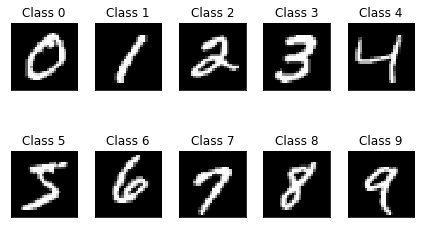

In [1]:
print('X_train.shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
# normalizing the inputs (-1, 1)
X_train = 2.0 * X_train.astype('float32') / 255.0 - 1.0

print('X_train reshape:', X_train.shape)

### 2. Define model

#### Generator

The generator is a simple fully connected neural network with three hidden layer with the ReLU activation. It takes one latent sample (100 values) and produces 784 (=28x28) data points which represent a digit image.

The input to the generator is called 'latent sample' which is a series of randomly generated numbers. We use the normal distribution rather than the uniform distribution as suggested in [4].

In [2]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator 
generator = Sequential()
generator.add(Dense(128, input_shape=(latent_dim,), activation='relu', kernel_initializer=init))
generator.add(BatchNormalization())
generator.add(Dense(256, activation='relu'))
generator.add(BatchNormalization())
generator.add(Dense(512, activation='relu'))
generator.add(BatchNormalization())
generator.add(Dense(img_dim, activation='tanh'))

#### Generator model visualization

In [ ]:
# plot a generator Keras model
plot_model(generator, to_file='img/generator_model.png',
           show_shapes=True, show_layer_names=True)

# prints a summary representation of your model
model.summary()

#### Discriminator

In [3]:
# Discriminator
discriminator = Sequential()
discriminator.add(Dense(512 input_shape=(img_dim,), activation='relu', kernel_initializer=init))
discriminator.add(Dense(256, activation='relu'))
discriminator.add(Dense(128, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

#### Discriminator model visualization

In [ ]:
# plot a generator Keras model
plot_model(discriminator, to_file='img/discriminator_model.png',
           show_shapes=True, show_layer_names=True)

# prints a summary representation of your model
model.summary()

### 3. Losses and compile model

In [4]:
# Optimizer
opt = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(opt, loss='binary_crossentropy',
                      metrics=['binary_accuracy'])

# from keras.models import Model
# from keras.layers import Input
# 
# # d_g = discriminador(generador(z))
# z = Input(shape=(latent_dim,))
# img = generator(z)
# decision = discriminator(img)
# d_g = Model(inputs=z, outputs=decision)

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)

discriminator.trainable = False
d_g.compile(opt, loss='binary_crossentropy',
            metrics=['binary_accuracy'])

### 4. Fit model

/usr/local/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch = 1/100, d_loss=0.611, g_loss=1.277                                                                                                                      


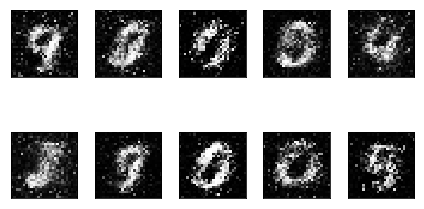

epoch = 2/100, d_loss=0.541, g_loss=1.347                                                                                                                                                                                                                                                                                                                             
epoch = 3/100, d_loss=0.765, g_loss=1.079                                                                                                                      
epoch = 4/100, d_loss=0.786, g_loss=0.980                                                                                                                      
epoch = 5/100, d_loss=0.609, g_loss=0.890                                                                                                                                                                                                                           
epoch = 6/100, d_loss=0.661, g_loss=0.858                   

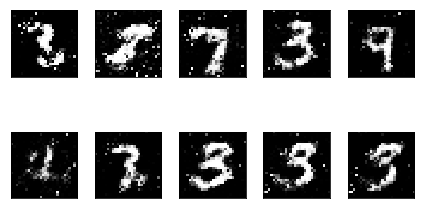

epoch = 12/100, d_loss=0.619, g_loss=1.044                                                                                                                      
epoch = 13/100, d_loss=0.568, g_loss=1.092                                                                                                                      
epoch = 14/100, d_loss=0.588, g_loss=1.005                                                                                                                      
epoch = 15/100, d_loss=0.537, g_loss=1.133                                                                                                                                                                                                                                                                                                                               
epoch = 16/100, d_loss=0.560, g_loss=1.158                                                                                                                 

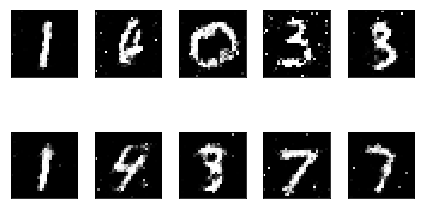

epoch = 22/100, d_loss=0.468, g_loss=1.443                                                                                                                      
epoch = 23/100, d_loss=0.379, g_loss=1.485                                                                                                                      
epoch = 24/100, d_loss=0.368, g_loss=1.386                                                                                                                      
epoch = 25/100, d_loss=0.455, g_loss=1.412                                                                                                                                                                                                                           
epoch = 26/100, d_loss=0.539, g_loss=1.447                                                                                                                                                                                                                     

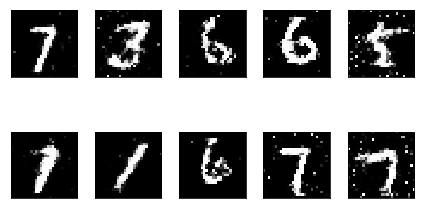

epoch = 32/100, d_loss=0.289, g_loss=1.648                                                                                                                      
epoch = 33/100, d_loss=0.273, g_loss=1.577                                                                                                                      
epoch = 34/100, d_loss=0.259, g_loss=1.607                                                                                                                      
epoch = 35/100, d_loss=0.242, g_loss=1.684                                                                                                                      
epoch = 36/100, d_loss=0.329, g_loss=1.880                                                                                                                      
epoch = 37/100, d_loss=0.245, g_loss=1.815                                                                                                                      
epoch = 38/100, d_loss=0.313, g_lo

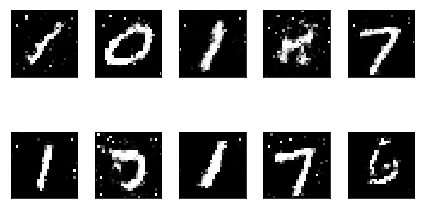

epoch = 42/100, d_loss=0.250, g_loss=1.621                                                                                                                      
epoch = 43/100, d_loss=0.279, g_loss=1.970                                                                                                                      
epoch = 44/100, d_loss=0.173, g_loss=1.641                                                                                                                      
epoch = 45/100, d_loss=0.286, g_loss=1.718                                                                                                                      
epoch = 46/100, d_loss=0.243, g_loss=1.716                                                                                                                      
epoch = 47/100, d_loss=0.337, g_loss=2.015                                                                                                                      
epoch = 48/100, d_loss=0.278, g_lo

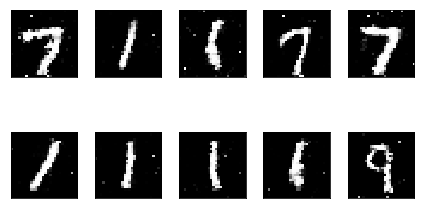

epoch = 52/100, d_loss=0.211, g_loss=2.082                                                                                                                      
epoch = 53/100, d_loss=0.268, g_loss=1.683                                                                                                                      
epoch = 54/100, d_loss=0.280, g_loss=1.690                                                                                                                      
epoch = 55/100, d_loss=0.255, g_loss=1.675                                                                                                                      
epoch = 56/100, d_loss=0.190, g_loss=1.716                                                                                                                      
epoch = 57/100, d_loss=0.273, g_loss=1.920                                                                                                                      
epoch = 58/100, d_loss=0.394, g_lo

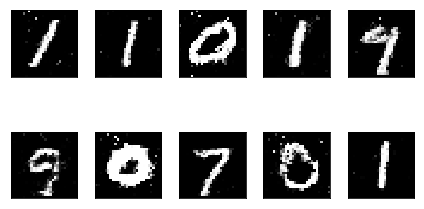

epoch = 62/100, d_loss=0.350, g_loss=1.706                                                                                                                      
epoch = 63/100, d_loss=0.302, g_loss=1.883                                                                                                                      
epoch = 64/100, d_loss=0.234, g_loss=1.777                                                                                                                      
epoch = 65/100, d_loss=0.291, g_loss=1.746                                                                                                                      
epoch = 66/100, d_loss=0.322, g_loss=1.969                                                                                                                      
epoch = 67/100, d_loss=0.341, g_loss=1.880                                                                                                                      
epoch = 68/100, d_loss=0.163, g_lo

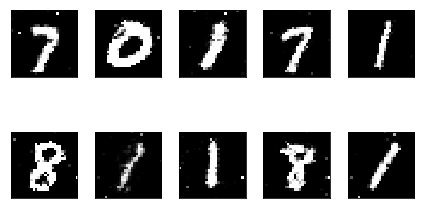

epoch = 72/100, d_loss=0.217, g_loss=1.985                                                                                                                      
epoch = 73/100, d_loss=0.189, g_loss=1.922                                                                                                                      
epoch = 74/100, d_loss=0.290, g_loss=2.133                                                                                                                      
epoch = 75/100, d_loss=0.271, g_loss=2.098                                                                                                                      
epoch = 76/100, d_loss=0.239, g_loss=2.176                                                                                                                      
epoch = 77/100, d_loss=0.231, g_loss=1.983                                                                                                                      
epoch = 78/100, d_loss=0.244, g_lo

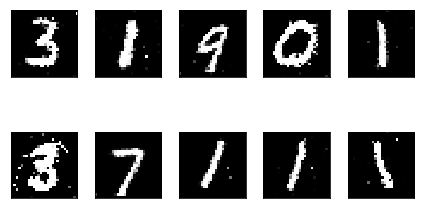

epoch = 82/100, d_loss=0.216, g_loss=2.066                                                                                                                      
epoch = 83/100, d_loss=0.219, g_loss=1.931                                                                                                                      
epoch = 84/100, d_loss=0.235, g_loss=1.891                                                                                                                      
epoch = 85/100, d_loss=0.267, g_loss=2.094                                                                                                                      
epoch = 86/100, d_loss=0.189, g_loss=1.971                                                                                                                      
epoch = 87/100, d_loss=0.203, g_loss=1.927                                                                                                                      
epoch = 88/100, d_loss=0.178, g_lo

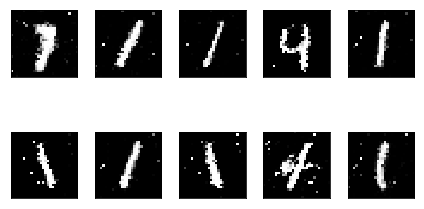

epoch = 92/100, d_loss=0.243, g_loss=1.911                                                                                                                      
epoch = 93/100, d_loss=0.203, g_loss=2.274                                                                                                                      
epoch = 94/100, d_loss=0.150, g_loss=2.270                                                                                                                      
epoch = 95/100, d_loss=0.173, g_loss=2.157                                                                                                                      
epoch = 96/100, d_loss=0.264, g_loss=2.414                                                                                                                                                                                                                          
epoch = 97/100, d_loss=0.236, g_loss=2.306                                                     

In [5]:
epochs = 100
batch_size = 64

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
g_loss = []

for e in range(epochs):
    for i in range(len(X_train) // batch_size):
        # Train Discriminator weights
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real)
        
        # Fake Samples
        z = np.random.uniform(size=(batch_size, latent_dim))
        X_fake = generator.predict(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        g_loss_batch = d_g.train_on_batch(x=z, y=real)
        
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.uniform(size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

### 5. Evaluate model

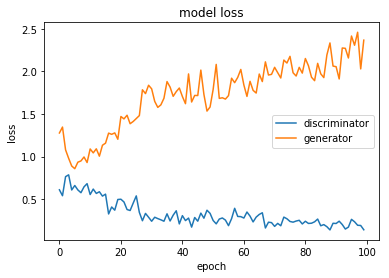

In [11]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['discriminator', 'generator'], loc='center right')
plt.show()

## References

* [Generative Adversarial Networks or GANs](https://arxiv.org/abs/1406.2661)
* [How to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks)
* [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)